In [1]:
#import dependencies
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import psycopg2
from config import pw
from sqlalchemy import create_engine

In [2]:
#connection to Postgre Database created, EmployeeSQL
conn = psycopg2.connect(host="localhost", port = 5433, database="EmployeeSQL", user="postgres", password = pw)

In [3]:
#turns the salaries table into DataFrame and check to see if it turned out ok
salaries_df = pd.read_sql("SELECT * FROM salaries", conn)
salaries_df.head(10)

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
5,10006,40000
6,10007,56724
7,10008,46671
8,10009,60929
9,10010,72488


In [4]:
#groups salary by "salary" amount and finds the count and display to make sure it turned out ok
salary_group = salaries_df.groupby("salary").agg({"emp_no": "count"})
salary_group.head(10)

,emp_no
salary,
40000,95346
40001,5
40002,10
40003,9
40004,9
40005,6
40006,10
40007,1
40008,1


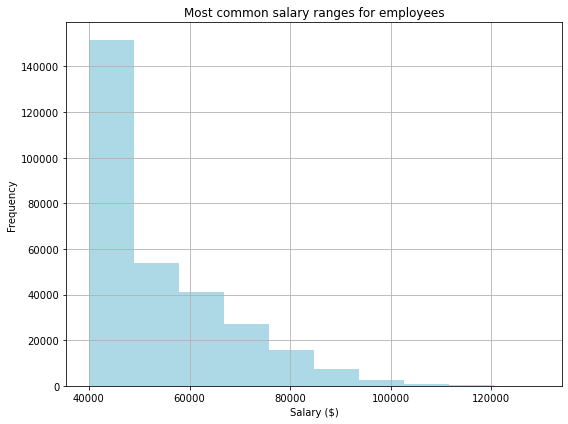

In [5]:
#plots the histogram of most common salary ranges for employees
salaries_plot = salaries_df.hist("salary", color = "lightblue", figsize=(8, 6))
plt.xlabel("Salary ($)")
plt.ylabel("Frequency")
plt.title("Most common salary ranges for employees")
plt.tight_layout()

#saves the plot as png
plt.savefig("Plot Images/Most common salary ranges for employees.png")

In [6]:
#turns the employees table into DataFrame and check to see if it turned out ok
employees_df = pd.read_sql("SELECT * FROM employees", conn)
employees_df.head(10)

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991
5,263976,e0003,10/30/1959,Eran,Cusworth,M,11/14/1986
6,273487,s0001,4/14/1957,Christoph,Parfitt,M,6/28/1991
7,461591,s0002,11/17/1964,Xudong,Samarati,M,11/13/1985
8,477657,e0002,12/18/1962,Lihong,Magliocco,M,10/23/1993
9,219881,s0002,4/24/1956,Kwangyoen,Speek,F,2/14/1993


In [7]:
#merges employees_df and salaries_df on emp_no
employees_salaries = pd.merge(employees_df, salaries_df, on = "emp_no", how = "outer")

In [8]:
#turns the titles table into DataFrame and check to see if it turned out ok
titles_df = pd.read_sql("SELECT * FROM titles", conn)
titles_df.head(10)

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [9]:
#rename emp_title_id column to make merging easier with title df and check to see if the column rename worked fine
employees_salaries.rename(columns = {"emp_title_id": "title_id"}, inplace = True)
employees_salaries.head(10)

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,40000
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991,53422
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992,48973
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,40000
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991,40000
5,263976,e0003,10/30/1959,Eran,Cusworth,M,11/14/1986,40000
6,273487,s0001,4/14/1957,Christoph,Parfitt,M,6/28/1991,56087
7,461591,s0002,11/17/1964,Xudong,Samarati,M,11/13/1985,40000
8,477657,e0002,12/18/1962,Lihong,Magliocco,M,10/23/1993,54816
9,219881,s0002,4/24/1956,Kwangyoen,Speek,F,2/14/1993,40000


In [10]:
#merge with titles dataframe and check to see if it turned out ok
employees_salaries_positions = pd.merge(employees_salaries, titles_df, on = "title_id", how = "outer")
employees_salaries_positions.head(10)

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,40000,Staff
1,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,40000,Staff
2,273487,s0001,4/14/1957,Christoph,Parfitt,M,6/28/1991,56087,Staff
3,246449,s0001,3/23/1958,Subbu,Bultermann,F,3/25/1988,87084,Staff
4,48085,s0001,1/19/1964,Venkatesan,Gilg,M,6/28/1993,63016,Staff
5,476443,s0001,8/27/1952,Ziya,Asmuth,M,8/24/1995,63371,Staff
6,424270,s0001,1/15/1963,Kellyn,Yoshizawa,F,5/8/1995,60678,Staff
7,427958,s0001,5/3/1957,Feixiong,Poujol,F,5/11/1985,63377,Staff
8,280408,s0001,9/19/1964,Elliott,Perl,M,10/29/1987,75963,Staff
9,229010,s0001,11/12/1961,Mark,Cappelli,M,5/7/1990,40000,Staff


In [11]:
#group by title and finds average salary 
title_avg_salary = employees_salaries_positions.groupby("title").agg({"salary" : "mean"})

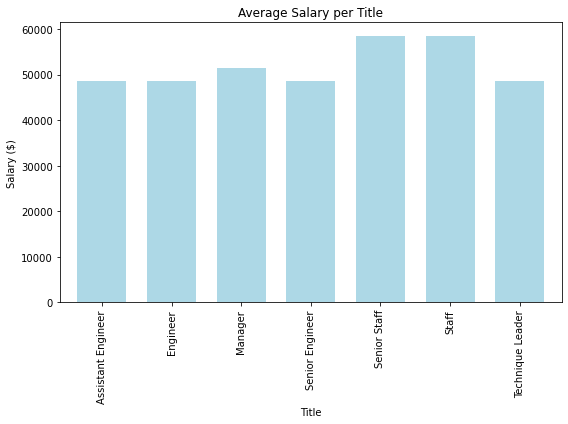

In [12]:
#plots the average salary of each title
title_avg_salary_plot = title_avg_salary.plot(kind = "bar", width = 0.7, color = "lightblue", figsize=(8, 6), legend = False)

#sets the y and x label and title
title_avg_salary_plot.set_ylabel("Salary ($)")
title_avg_salary_plot.set_xlabel("Title")
title_avg_salary_plot.set_title("Average Salary per Title")

plt.tight_layout()

#saves the plot as png
plt.savefig("Plot Images/Average Salary per Title.png")